# PyTorch로 시작하는 딥러닝

# 02 : 신경망 구성 요소

Building Blocks Of Neural Networks_completed

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable

torch.__version__

'1.8.1+cu101'

## 모델 학습의 전반적인 프로세스

1. 데이터 준비 : **get_data()** 함수는 입력과 출력 데이터로 구성된 Tensor 배열을 제공합니다. 

2. 학습 파라미터 생성 : **get_weights()** 함수는 임의의 수를 포함하는 Tensor를 제공합니다. 이 임의의 수는 이 문제의 해법을 구하기 위해서 최적화 됩니다. 

3. 네트워크 모델 : **simple_network()** 는 선형 규칙을 적용하고 가중치에 입력 데이터를 곱하고 바이어스 항 (y = Wx + b)을 더하여 입력 데이터에 대한 출력을 생성합니다.

4. 오차 : **loss_fn()** 함수는 모델의 얼마나 좋은지에 대한 정보를 제공합니다. 

5. 옵티마이저 : **optimize()** 함수는 초기에 생성 된 임의의 가중치를 조정하여 모델이 목표 값을보다 정확하게 계산하도록합니다.

## PyTorch로 첫 번째 신경망 만들기 : 간단한 예제

In [2]:
# 학습 데이터
def get_data():
    train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
    train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
    dtype = torch.FloatTensor
    # 데이터 타입을 torch.FloatTensor로 바꿈
    # np.array에서 torch로 자료형 바꿀땐 아래와 같이 torch.from_numpy(np.array).type(torch.FloatTensor) 형태 사용 학습 데이터
    X = Variable(torch.from_numpy(train_X).type(dtype),requires_grad=False).view(17,1)
    y = Variable(torch.from_numpy(train_Y).type(dtype),requires_grad=False)
    return X,y

def plot_variable(x,y,z='',**kwargs):
    l = []
    for a in [x,y]:
        #1.0 업그레이드에서 필요 없는 코드
        #if type(a) == Variable:
        l.append(a.data.numpy())
    plt.plot(l[0],l[1],z,**kwargs)

def get_weights():
    # w, b의 초기값 생성
    # torch.randn으로 표준정규분포에서 난수 하나 추출
    # requires_grade=False로 설정하면 역전파 중에 이 Variable들에 대한 변화도를 계산할 필요가 없음을 나타냅니다.
    # requires_grade=True로 설정하면 역전파 중에 이 Variable들에 대한 변화도를 계산할 필요가 없음을 나타냅니다.
    w = Variable(torch.randn(1),requires_grad = True)
    b = Variable(torch.randn(1),requires_grad=True)
    return w,b

def simple_network(x):
    # y = wx + b
    y_pred = torch.matmul(x,w)+b
    return y_pred

def loss_fn(y,y_pred):
    # loss 계산, loss = sum of squared error
    loss = (y_pred-y).pow(2).sum()
    # gradient 계산
    for param in [w,b]:
        if not param.grad is None: param.grad.data.zero_()
    loss.backward()
    return loss.data


def optimize(learning_rate):
    # update weight and bias
    w.data -= learning_rate * w.grad.data
    b.data -= learning_rate * b.grad.data

learning_rate = 1e-4

In [3]:
x, y = get_data()
w, b = get_weights()

for i in range(500):
  y_pred = simple_network(x)

  loss = loss_fn(y, y_pred)

  if i % 50 == 0:
    print("{}번째 계산, loss = {}".format(i, loss))
  
  optimize(learning_rate)

0번째 계산, loss = 390.02252197265625
50번째 계산, loss = 2.7674529552459717
100번째 계산, loss = 2.7612903118133545
150번째 계산, loss = 2.7553980350494385
200번째 계산, loss = 2.749744415283203
250번째 계산, loss = 2.744318723678589
300번째 계산, loss = 2.7391128540039062
350번째 계산, loss = 2.7341175079345703
400번째 계산, loss = 2.729323387145996
450번째 계산, loss = 2.7247231006622314


In [4]:
x.data.numpy()

array([[ 3.3  ],
       [ 4.4  ],
       [ 5.5  ],
       [ 6.71 ],
       [ 6.93 ],
       [ 4.168],
       [ 9.779],
       [ 6.182],
       [ 7.59 ],
       [ 2.167],
       [ 7.042],
       [10.791],
       [ 5.313],
       [ 7.997],
       [ 5.654],
       [ 9.27 ],
       [ 3.1  ]], dtype=float32)

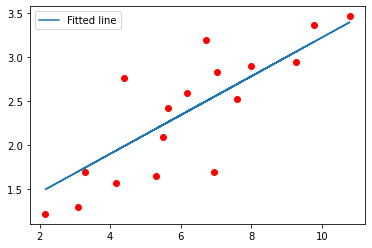

In [5]:
x_numpy = x.data.numpy()

plot_variable(x, y, 'ro')
plot_variable(x, y_pred, label = "Fitted line")

plt.legend()

plt.show()

## Tensor 소개

여러 차원의 tensor들

In [6]:
# scalar

x0 = torch.rand(1) # 0~1 uniform 분포에서의 추출
print(x0)
print(x0.size())

tensor([0.5600])
torch.Size([1])


In [7]:
# vector

x1 = torch.FloatTensor([23, 24, 24, 5, 26, 27, 2, 23, 0])
print(x1)
print(x1.size())
# np.array.shape 대신 torch.FloatTensor.size

tensor([23., 24., 24.,  5., 26., 27.,  2., 23.,  0.])
torch.Size([9])


In [8]:
# matrix

from sklearn.datasets import load_boston

boston = load_boston()
print(boston.keys())
print(boston.data.shape)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)


In [9]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [10]:
boston_tensor = torch.from_numpy(boston.data)
print(boston_tensor.size())

torch.Size([506, 13])


In [11]:
print(boston_tensor[:2].shape)
boston_tensor[:2]

torch.Size([2, 13])


tensor([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01, 6.5750e+00,
         6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02, 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01, 6.4210e+00,
         7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02, 1.7800e+01, 3.9690e+02,
         9.1400e+00]], dtype=torch.float64)

In [12]:
boston_tensor[:10, :5]

tensor([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01],
        [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01],
        [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01],
        [2.9850e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01],
        [8.8290e-02, 1.2500e+01, 7.8700e+00, 0.0000e+00, 5.2400e-01],
        [1.4455e-01, 1.2500e+01, 7.8700e+00, 0.0000e+00, 5.2400e-01],
        [2.1124e-01, 1.2500e+01, 7.8700e+00, 0.0000e+00, 5.2400e-01],
        [1.7004e-01, 1.2500e+01, 7.8700e+00, 0.0000e+00, 5.2400e-01]],
       dtype=torch.float64)

In [13]:
# 3d tensor

# from PIL import Image

# panda = np.array(Image.open('../images/B09301_03_12.jpg').resize((224,224)))
# panda_tensor = torch.from_numpy(panda)
# panda_tensor.size()

In [14]:
# plt.imshow(panda)

In [15]:
# tensor 자르기

sales = torch.FloatTensor([1000.0,323.2,333.4,444.5,1000.0,323.2,333.4,444.5])

In [16]:
sales[:5]

tensor([1000.0000,  323.2000,  333.4000,  444.5000, 1000.0000])

In [17]:
sales[:-5]

tensor([1000.0000,  323.2000,  333.4000])

In [18]:
# plt.imshow(panda_tensor[:, :, 0].numpy())

In [19]:
# plt.imshow(panda_tensor[25:175, 60:130, 0].numpy())

In [20]:
# tensor에서 특정 요소 가져오기

sales = torch.eye(3, 3) # 단위행렬
sales

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [21]:
sales[1, 1]

tensor(1.)

In [22]:
# from glob import glob
# #디스크에서 고양이 이미지 읽기
# data_path='/Users/vishnu/Documents/fastAIPytorch/fastai/courses/dl1/data/dogscats/train/cats/'
# cats = glob(data_path+'*.jpg')
# #Convert images into numpy arrays
# cat_imgs = np.array([np.array(Image.open(cat).resize((224,224))) for cat in
# cats[:64]])
# cat_imgs = cat_imgs.reshape(-1,224,224,3)
# cat_tensors = torch.from_numpy(cat_imgs)
# cat_tensors.size()

In [23]:
# tensor 덧셈 곱셈

a = torch.rand(2, 2)
b = torch.rand(2, 2)

c = a + b
d = torch.add(a, b)

print(c)
print(d)

print(a)
print(a.add_(5)) # 더한게 a에 저장됨

tensor([[1.3729, 0.7935],
        [1.1906, 0.8979]])
tensor([[1.3729, 0.7935],
        [1.1906, 0.8979]])
tensor([[0.8278, 0.5704],
        [0.5492, 0.3611]])
tensor([[5.8278, 5.5704],
        [5.5492, 5.3611]])


In [24]:
print(a * b)
print(a.mul(b))

tensor([[3.1766, 1.2430],
        [3.5594, 2.8781]])
tensor([[3.1766, 1.2430],
        [3.5594, 2.8781]])


In [25]:
print(a.mul_(b)) # 곱한게 a에 저장됨
print(a)

tensor([[3.1766, 1.2430],
        [3.5594, 2.8781]])
tensor([[3.1766, 1.2430],
        [3.5594, 2.8781]])


In [26]:
#GPU에 Tensor 이동
from torch import cuda 

if cuda.is_available(): 
    a = a.cuda()
    b = b.cuda()
    a.matmul(b)
#Time taken : 11.2 µs  

In [27]:
# variable

from torch.autograd import Variable

x = Variable(torch.ones(2, 2), requires_grad = True)
y = x.mean()

In [28]:
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [29]:
y.backward()

In [30]:
y.grad_fn

In [31]:
x.grad

tensor([[0.2500, 0.2500],
        [0.2500, 0.2500]])

## 다시 보는 간단한 예제

In [32]:
def get_data():
    train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
    train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
    
    dtype = torch.FloatTensor
    
    X = Variable(torch.from_numpy(train_X).type(dtype),requires_grad=False).view(17,1)
    y = Variable(torch.from_numpy(train_Y).type(dtype),requires_grad=False)
    return X,y

In [33]:
def get_weights():
    w = Variable(torch.randn(1),requires_grad = True)
    b = Variable(torch.randn(1),requires_grad=True)
    return w,b

In [34]:
def simple_network(x):
    y_pred = torch.matmul(x,w)+b
    return y_pred

In [35]:
import torch.nn as nn

f = nn.Linear(17,1) # Much simpler.

f

Linear(in_features=17, out_features=1, bias=True)

In [36]:
def loss_fn(y,y_pred):
    
    loss = (y_pred-y).pow(2).sum()
    for param in [w,b]:
        if not param.grad is None: param.grad.data.zero_()

    loss.backward()
    
    return loss.data[0]

In [37]:
def optimize(learning_rate):
    w.data -= learning_rate * w.grad.data
    b.data -= learning_rate * b.grad.data

In [38]:
# class DogsAndCatsDataset(Dataset):
#     def __init__(self,root_dir,size=(224,224)):
#         self.files = glob(root_dir)
#         self.size = size
#     def __len__(self):
#         return len(self.files)
#     def __getitem__(self,idx):
#         img = np.asarray(Image.open(self.files[idx]).resize(self.size))
#         label = self.files[idx].split('/')[-2]
#         return img,label

In [39]:
# from torch.utils.data import Dataset, DataLoader

# #dataloader = DataLoader(DogsAndCatsDataset,batch_size=32,num_workers=2)
# #for imgs , labels in dataloader:
#         #학습 데이터셋에 딥러닝 네트워크 적용
# #    pass